In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from sklearn import preprocessing

import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'u'
project = 'nlp_course_w'
data = make_dir_line(modality, project)

raw = data('raw')
processed = data('processed')

# AIMS

In [4]:
# reading the csv into a pandas dataframe
import pandas as pd

news_articles_df = pd.read_csv(raw / 'articles1.csv')

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 50000 rows and 10 columns


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
#dropping the first unnames column (axis = 1 means it's column-wise operation. So Column 0 will be dropped)

news_articles_df = news_articles_df.drop(news_articles_df.columns[0], axis = 1) 

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 50000 rows and 9 columns


,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [6]:
news_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  float64
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.4+ MB


In [7]:
news_articles_df.isnull().sum()

id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

### **EDA of the dataset**

<Axes: xlabel='publication', ylabel='Counts'>

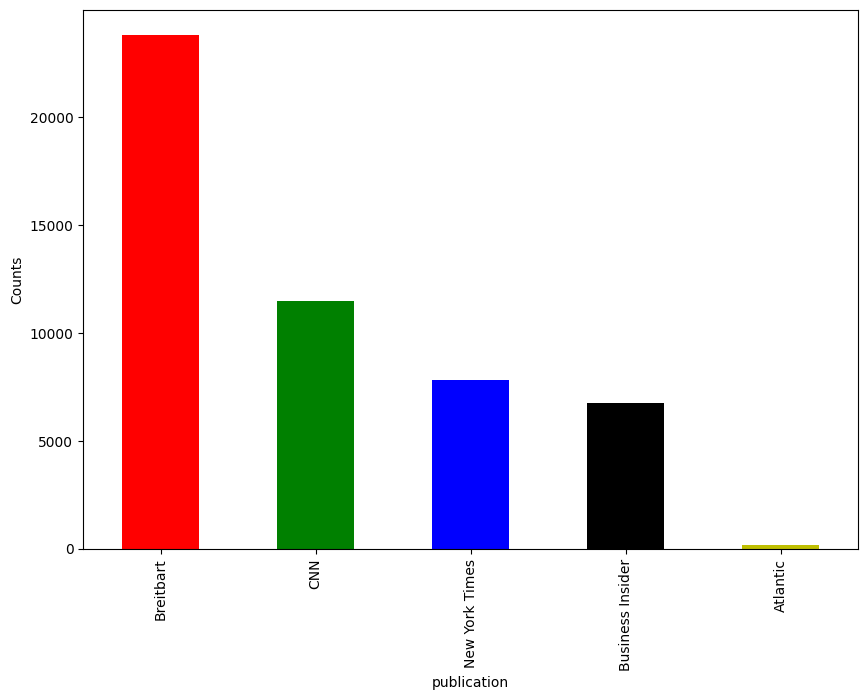

In [8]:
# Visualization of news publications names and article count in the dataset

import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Publications")
plt.ylabel("Counts")

news_articles_df.publication.value_counts().plot(kind='bar', color=color_list)

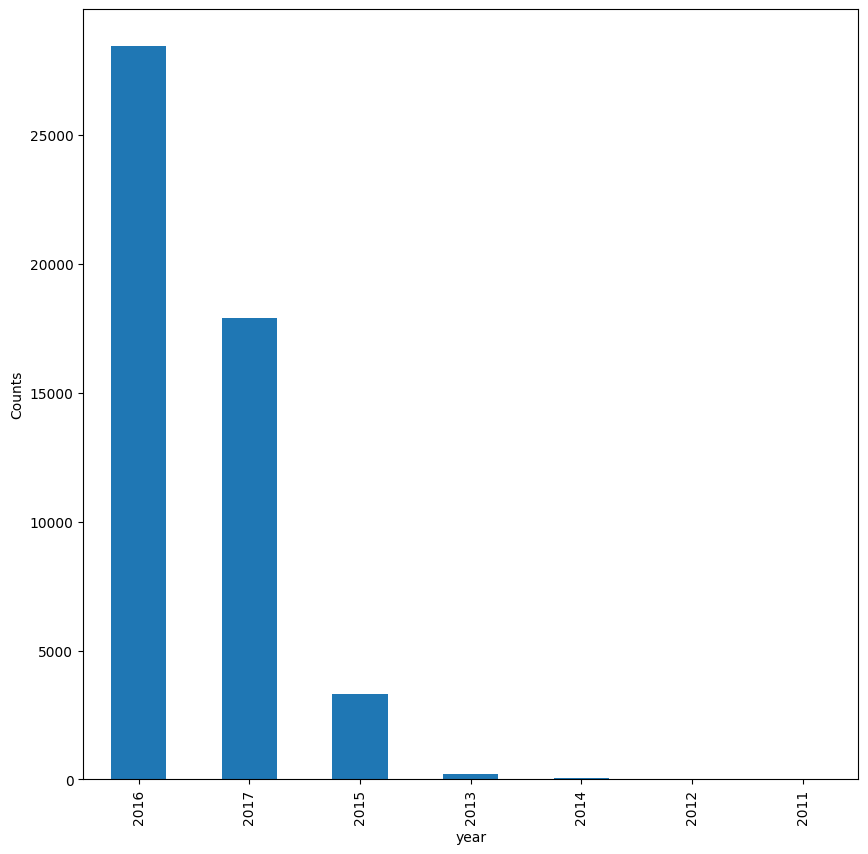

In [9]:
# Visualization of news article count per year

news_articles_df['year'] = news_articles_df['year'].map(int).map(str)
news_articles_df['year'] = pd.to_datetime(news_articles_df['year'], format='%Y').dt.strftime('%Y')
news_articles_df = news_articles_df.sort_values(by='year')

plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Counts")

news_articles_df.year.value_counts().plot(kind='bar')
plt.show()

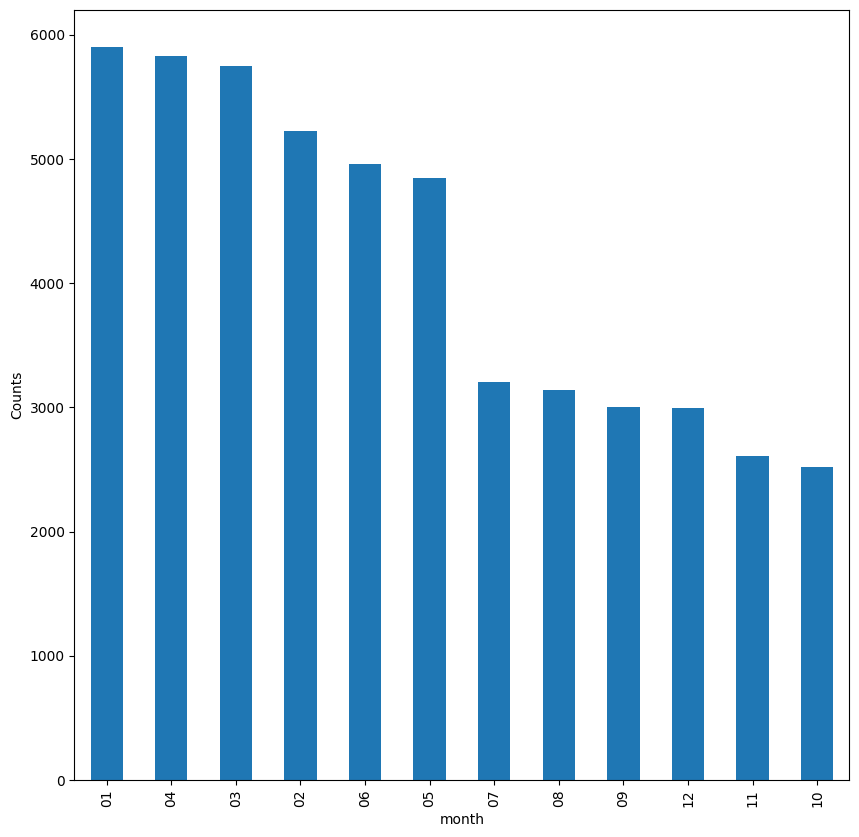

In [10]:
# Visualization of news article count released monthly to observe if any pattern exists 

news_articles_df['month'] = news_articles_df['month'].map(int).map(str)
news_articles_df['month'] = pd.to_datetime(news_articles_df['month'], format='%m').dt.strftime('%m')
news_articles_df = news_articles_df.sort_values(by='month')

plt.figure(figsize=(10,10))
plt.xlabel("month")
plt.ylabel("Counts")

news_articles_df.month.value_counts().plot(kind='bar')
plt.show()

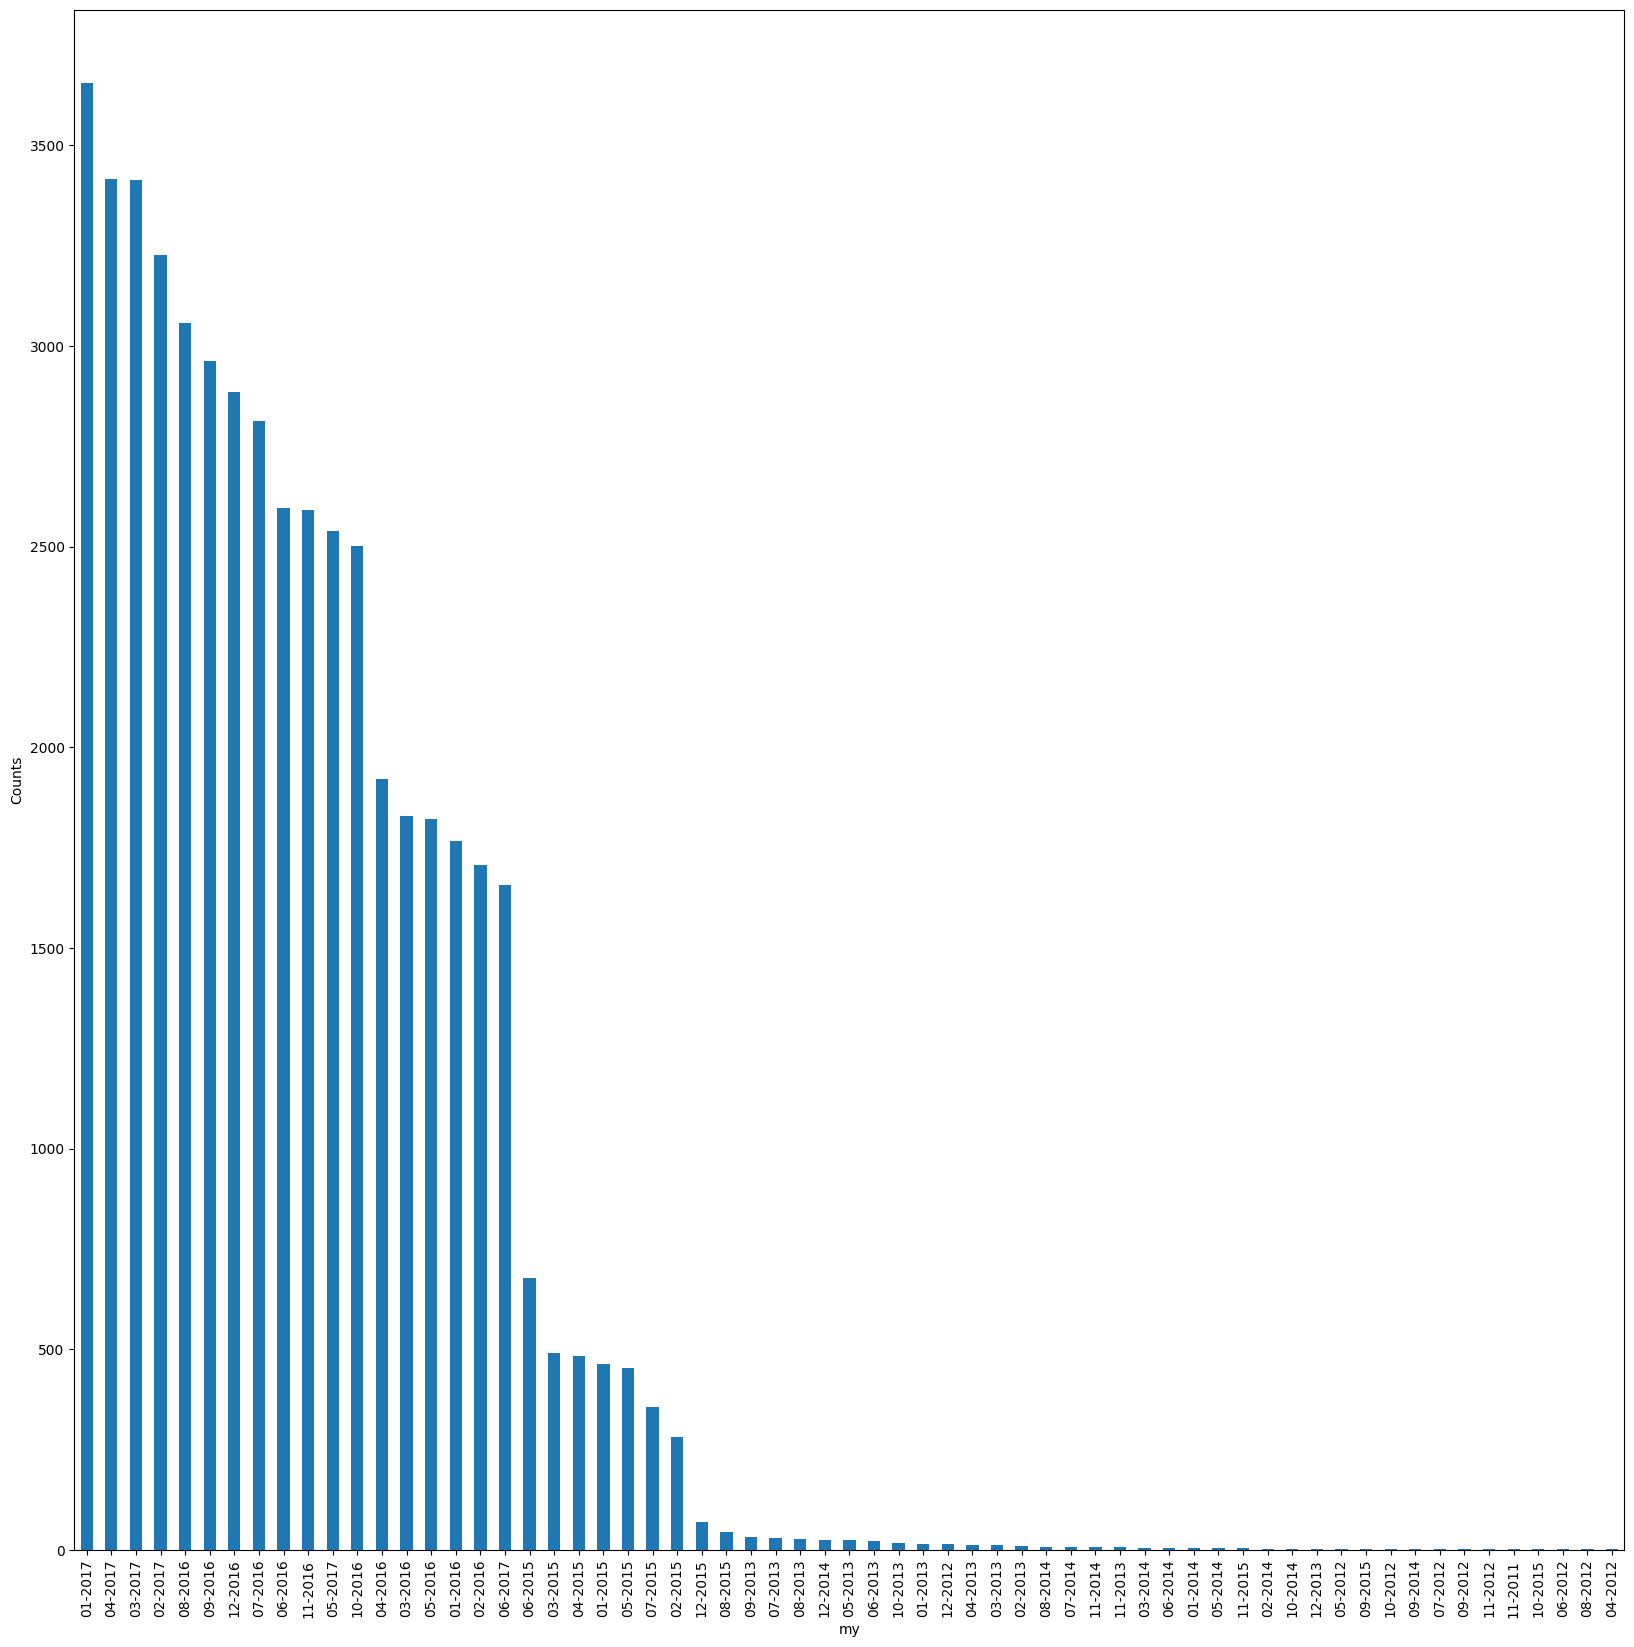

In [11]:
# Visualization of news article count per month-year

news_articles_df['my'] = news_articles_df['month'].map(int).map(str) + '-' + news_articles_df['year'].map(int).map(str)
news_articles_df['my'] = pd.to_datetime(news_articles_df['my'], format='%m-%Y').dt.strftime('%m-%Y')
news_articles_df = news_articles_df.sort_values(by='my')

plt.figure(figsize=(20,20))
plt.xlabel("month-year")
plt.ylabel("Counts")

news_articles_df.my.value_counts().plot(kind='bar')
plt.show()

In [12]:
# initializing a new dataframe with only the title column for faster operation 

title_df = news_articles_df['title']
title_df = title_df.to_frame()

title_df.sample(10, random_state = 5)

,title
6556,Reince Priebus Urges G.O.P. Unity Behind Trump...
16577,Report: 97 Percent of DOJ Employee Political D...
13476,Hungary: EU Soros Puppets Attack Us For Fighti...
26922,Hillary Clinton Booed at Debate for Madeleine ...
12475,Goldman Sachs CEO: Trump’s Executive Order on ...
17325,Paris Cardinal: Islamists Worship a ‘God of De...
14057,Calls Grow to Use National Guard to Protect Co...
920,White House Says Bathrobe Anecdote Is All Wet ...
33268,Border mystery: Where are the immigrants?
34286,Earth Day Fast Facts


<Axes: xlabel='title length', ylabel='No. of articles'>

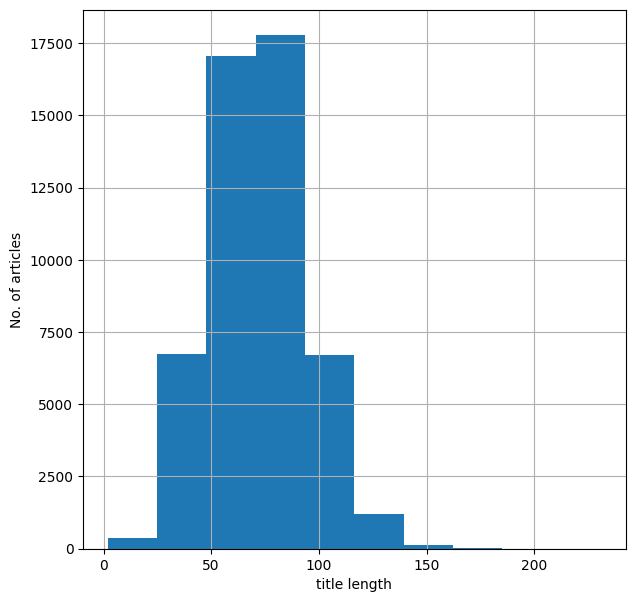

In [13]:
# visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("title length")
plt.ylabel("No. of articles")

title_df['title'].str.len().hist()

## **Part of Speech Tagging**

In [14]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /home/oecorrechag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/oecorrechag/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
import contractions

In [16]:
title_df['title'] = title_df['title'].apply(lambda x: [contractions.fix(word) for word in x.split()])
title_df.sample(10, random_state = 5)

,title
6556,"[Reince, Priebus, Urges, G.O.P., Unity, Behind..."
16577,"[Report:, 97, Percent, of, DOJ, Employee, Poli..."
13476,"[Hungary:, EU, Soros, Puppets, Attack, Us, For..."
26922,"[Hillary, Clinton, Booed, at, Debate, for, Mad..."
12475,"[Goldman, Sachs, CEO:, Trump’s, Executive, Ord..."
17325,"[Paris, Cardinal:, Islamists, Worship, a, ‘God..."
14057,"[Calls, Grow, to, Use, National, Guard, to, Pr..."
920,"[White, House, Says, Bathrobe, Anecdote, Is, A..."
33268,"[Border, mystery:, Where, are, the, immigrants?]"
34286,"[Earth, Day, Fast, Facts]"


In [17]:
#joining back the list of items into one string

title_df['title'] = [' '.join(map(str, l)) for l in title_df['title']]
title_df.sample(10, random_state = 5)

,title
6556,Reince Priebus Urges G.O.P. Unity Behind Trump...
16577,Report: 97 Percent of DOJ Employee Political D...
13476,Hungary: EU Soros Puppets Attack Us For Fighti...
26922,Hillary Clinton Booed at Debate for Madeleine ...
12475,Goldman Sachs CEO: Trump’s Executive Order on ...
17325,Paris Cardinal: Islamists Worship a ‘God of De...
14057,Calls Grow to Use National Guard to Protect Co...
920,White House Says Bathrobe Anecdote Is All Wet ...
33268,Border mystery: Where are the immigrants?
34286,Earth Day Fast Facts


In [18]:
import regex as re

In [19]:
title_df['title'] = title_df['title'].str.lower()
title_df['title'] = title_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

title_df.sample(10, random_state = 5)

,title
6556,reince priebus urges gop unity behind trump t...
16577,report 97 percent of doj employee political do...
13476,hungary eu soros puppets attack us for fightin...
26922,hillary clinton booed at debate for madeleine ...
12475,goldman sachs ceo trumps executive order on im...
17325,paris cardinal islamists worship a god of death
14057,calls grow to use national guard to protect co...
920,white house says bathrobe anecdote is all wet ...
33268,border mystery where are the immigrants
34286,earth day fast facts


In [20]:
#nltk tokenization

title_df['tokenized_title'] = title_df['title'].apply(word_tokenize)
title_df.sample(10, random_state = 5)

,title,tokenized_title
6556,reince priebus urges gop unity behind trump t...,"[reince, priebus, urges, gop, unity, behind, t..."
16577,report 97 percent of doj employee political do...,"[report, 97, percent, of, doj, employee, polit..."
13476,hungary eu soros puppets attack us for fightin...,"[hungary, eu, soros, puppets, attack, us, for,..."
26922,hillary clinton booed at debate for madeleine ...,"[hillary, clinton, booed, at, debate, for, mad..."
12475,goldman sachs ceo trumps executive order on im...,"[goldman, sachs, ceo, trumps, executive, order..."
17325,paris cardinal islamists worship a god of death,"[paris, cardinal, islamists, worship, a, god, ..."
14057,calls grow to use national guard to protect co...,"[calls, grow, to, use, national, guard, to, pr..."
920,white house says bathrobe anecdote is all wet ...,"[white, house, says, bathrobe, anecdote, is, a..."
33268,border mystery where are the immigrants,"[border, mystery, where, are, the, immigrants]"
34286,earth day fast facts,"[earth, day, fast, facts]"


In [21]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oecorrechag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


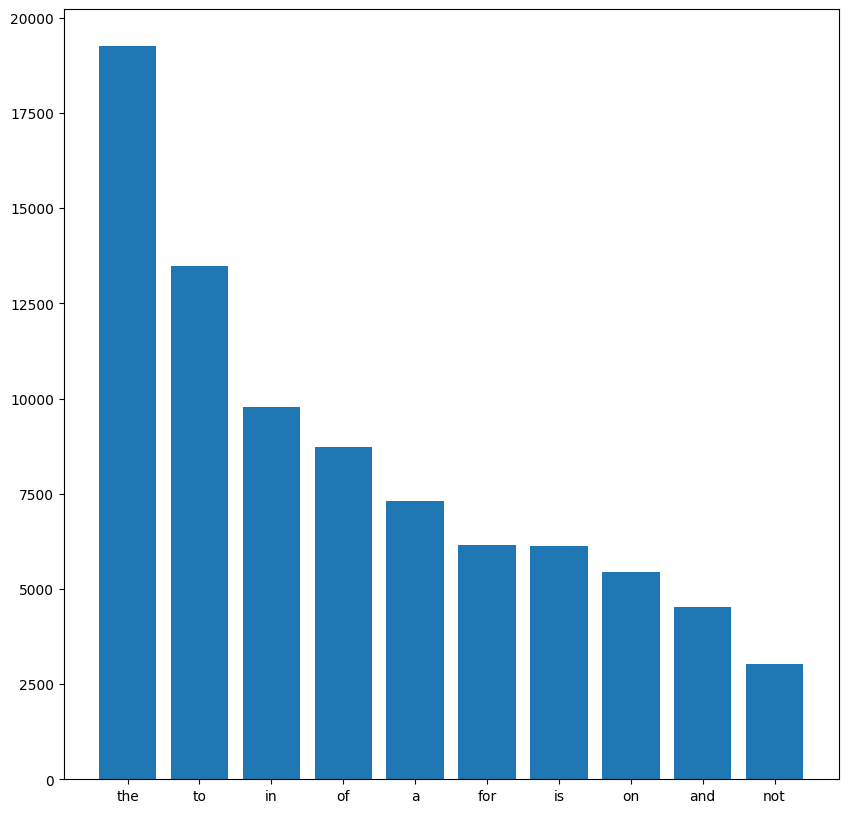

In [22]:
# Before removing checking occurances of stopwords in headline


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(title_df['title'])

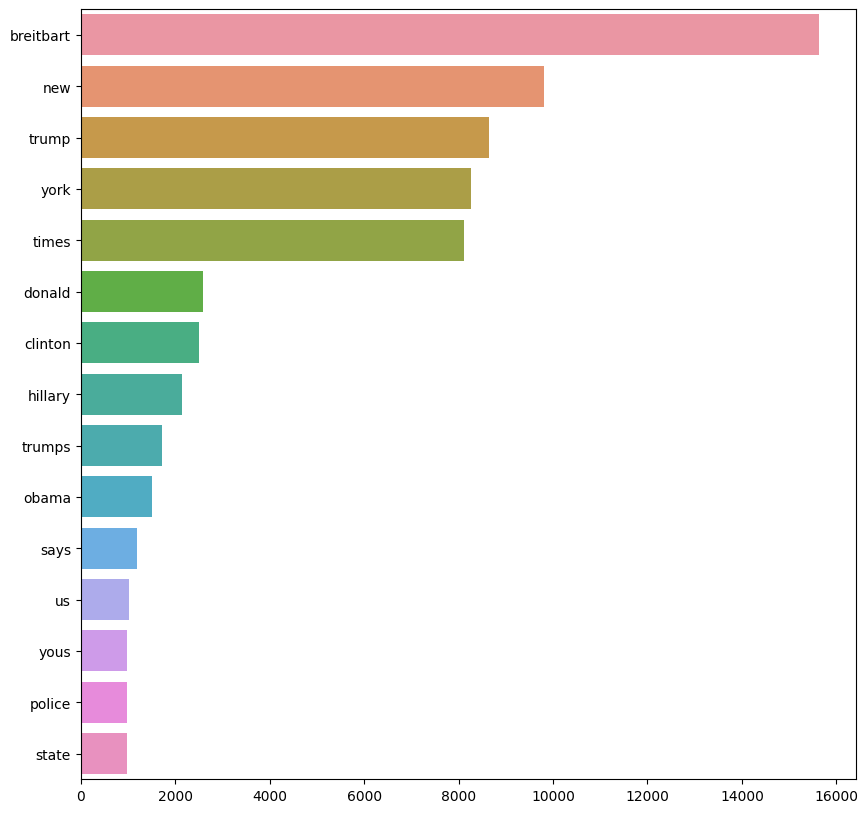

In [23]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(title_df['title'])

In [24]:
# Now removing stopwords 

title_df['tokenized_title'] = title_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
title_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in title_df['tokenized_title']]

title_df.sample(10, random_state = 5)

,title,tokenized_title,tokenized_title_join
6556,reince priebus urges gop unity behind trump t...,"[reince, priebus, urges, gop, unity, behind, t...",reince priebus urges gop unity behind trump ne...
16577,report 97 percent of doj employee political do...,"[report, 97, percent, doj, employee, political...",report 97 percent doj employee political donat...
13476,hungary eu soros puppets attack us for fightin...,"[hungary, eu, soros, puppets, attack, us, figh...",hungary eu soros puppets attack us fighting ma...
26922,hillary clinton booed at debate for madeleine ...,"[hillary, clinton, booed, debate, madeleine, a...",hillary clinton booed debate madeleine albrigh...
12475,goldman sachs ceo trumps executive order on im...,"[goldman, sachs, ceo, trumps, executive, order...",goldman sachs ceo trumps executive order immig...
17325,paris cardinal islamists worship a god of death,"[paris, cardinal, islamists, worship, god, death]",paris cardinal islamists worship god death
14057,calls grow to use national guard to protect co...,"[calls, grow, use, national, guard, protect, c...",calls grow use national guard protect coulter ...
920,white house says bathrobe anecdote is all wet ...,"[white, house, says, bathrobe, anecdote, wet, ...",white house says bathrobe anecdote wet new yor...
33268,border mystery where are the immigrants,"[border, mystery, immigrants]",border mystery immigrants
34286,earth day fast facts,"[earth, day, fast, facts]",earth day fast facts


In [25]:
# for sake of simplicity, showing 10 titles based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in title_df['tokenized_title'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('reince', 'NN'), ('priebus', 'NN'), ('urges', 'VBZ'), ('gop', 'VBP'), ('unity', 'NN'), ('behind', 'IN'), ('trump', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
[('report', 'NN'), ('97', 'CD'), ('percent', 'NN'), ('doj', 'NN'), ('employee', 'NN'), ('political', 'JJ'), ('donations', 'NNS'), ('went', 'VBD'), ('clinton', 'NN')]
[('hungary', 'JJ'), ('eu', 'NN'), ('soros', 'JJ'), ('puppets', 'NNS'), ('attack', 'VBP'), ('us', 'PRP'), ('fighting', 'VBG'), ('mass', 'NN'), ('migration', 'NN')]
[('hillary', 'JJ'), ('clinton', 'NN'), ('booed', 'NN'), ('debate', 'NN'), ('madeleine', 'NN'), ('albrights', 'NNS'), ('special', 'JJ'), ('place', 'NN'), ('hell', 'NN'), ('breitbart', 'NN')]
[('goldman', 'NN'), ('sachs', 'VBZ'), ('ceo', 'JJ'), ('trumps', 'NNS'), ('executive', 'NN'), ('order', 'NN'), ('immigration', 'NN'), ('policy', 'NN'), ('support', 'NN')]
[('paris', 'JJ'), ('cardinal', 'JJ'), ('islamists', 'NNS'), ('worship', 'VBP'), ('god', 'JJ'), ('death', 'NN')]
[('calls', 'NNS'), ('grow'

In [26]:
from yellowbrick.text import PosTagVisualizer

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

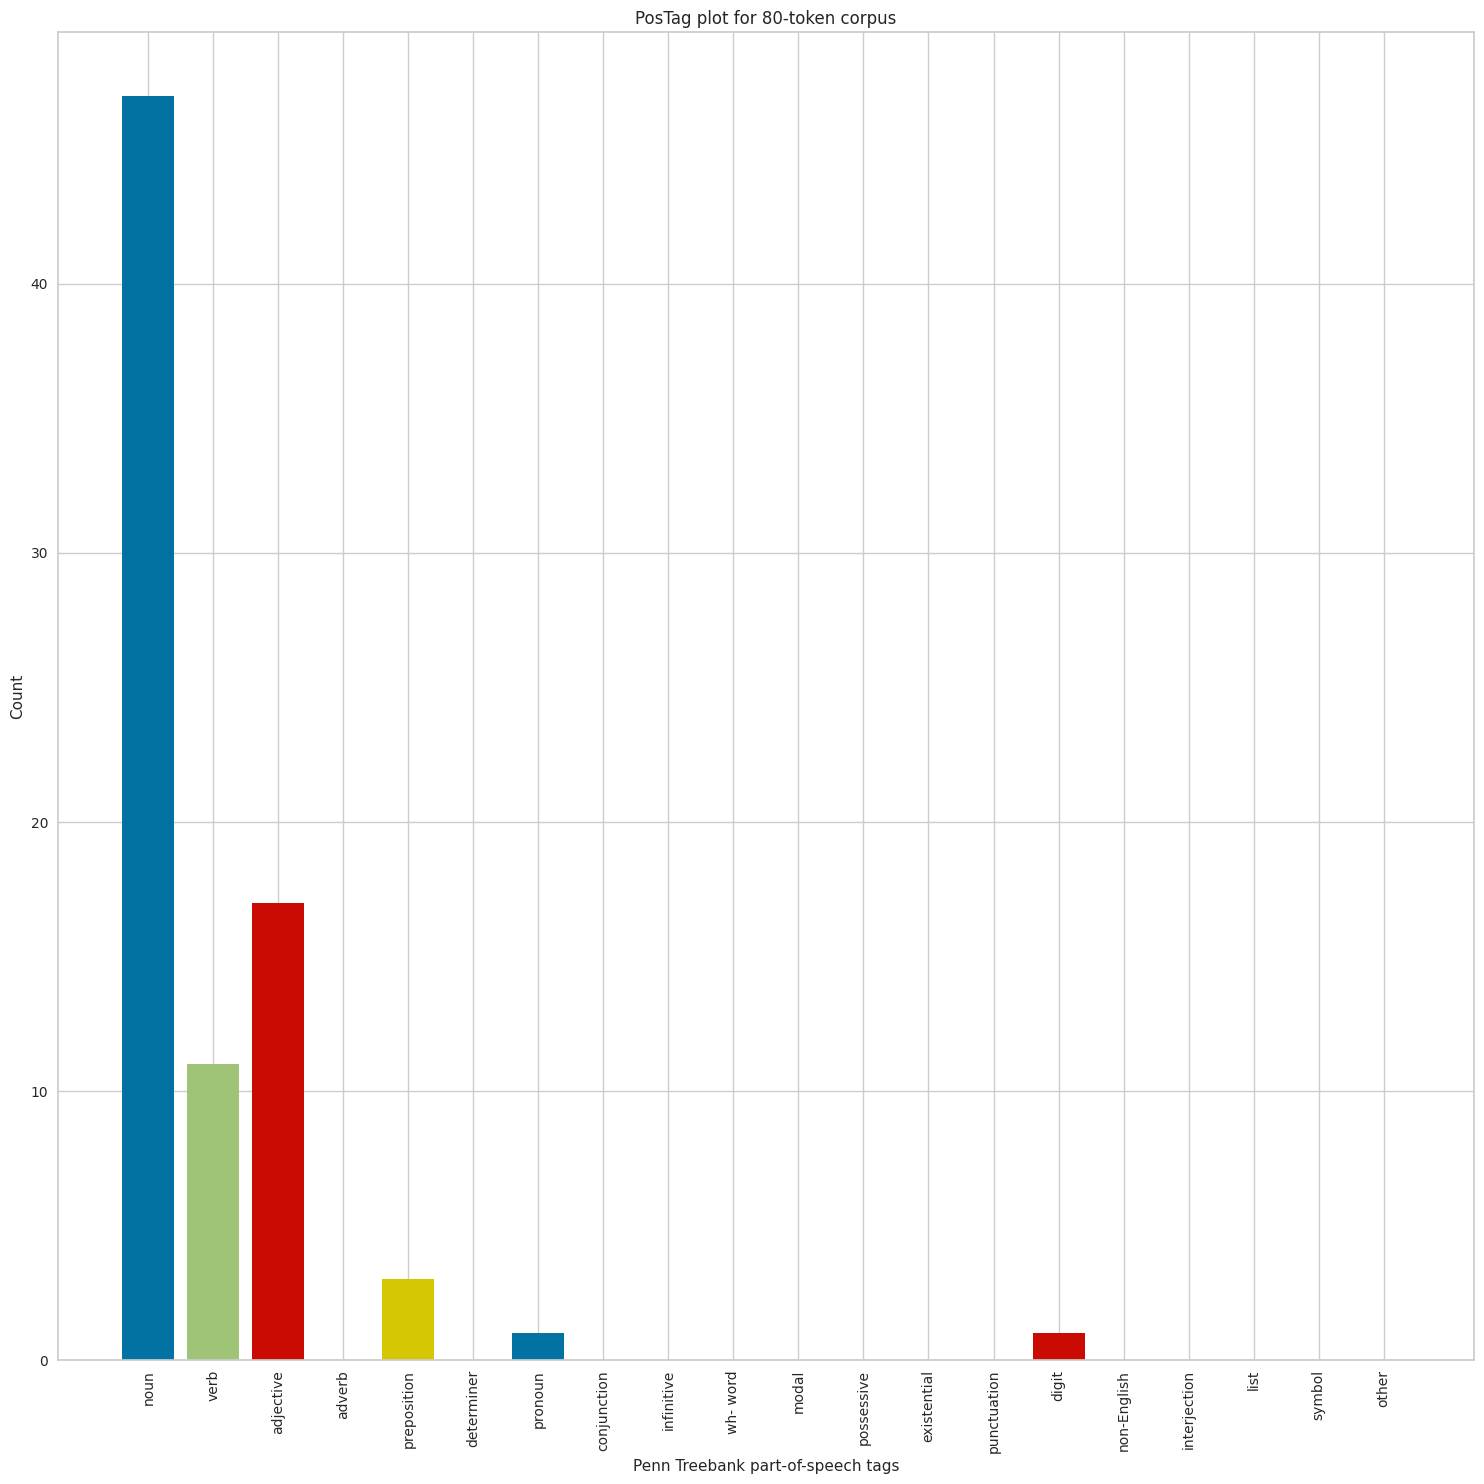

<Axes: title={'center': 'PosTag plot for 80-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [27]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

![alt text](https://miro.medium.com/max/700/1*bDMdq-EpaAr2fLTN84Ljgg.png)

In [28]:
import nltk 

In [29]:
for sentence in tagged_stanzas:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern) 
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('reince', 'NN'), ('priebus', 'NN'), ('urges', 'VBZ'), ('gop', 'VBP'), ('unity', 'NN'), ('behind', 'IN'), ('trump', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('times', 'NNS')]
(S
  (NP reince/NN)
  (NP priebus/NN)
  urges/VBZ
  gop/VBP
  (NP unity/NN)
  behind/IN
  (NP trump/JJ new/JJ york/NN)
  times/NNS)

[('report', 'NN'), ('97', 'CD'), ('percent', 'NN'), ('doj', 'NN'), ('employee', 'NN'), ('political', 'JJ'), ('donations', 'NNS'), ('went', 'VBD'), ('clinton', 'NN')]
(S
  (NP report/NN)
  97/CD
  (NP percent/NN)
  (NP doj/NN)
  (NP employee/NN)
  political/JJ
  donations/NNS
  went/VBD
  (NP clinton/NN))

[('hungary', 'JJ'), ('eu', 'NN'), ('soros', 'JJ'), ('puppets', 'NNS'), ('attack', 'VBP'), ('us', 'PRP'), ('fighting', 'VBG'), ('mass', 'NN'), ('migration', 'NN')]
(S
  (NP hungary/JJ eu/NN)
  soros/JJ
  puppets/NNS
  attack/VBP
  us/PRP
  fighting/VBG
  (NP mass/NN)
  (NP migration/NN))

[('hillary', 'JJ'), ('clinton', 'NN'), ('booed', 'NN'), ('debate', 'NN'), ('madeleine', 'NN'), ('a

In [35]:
import spacy
nlp = spacy.load("en_core_web_md")
nlp

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

### Dependency Parsing

In [33]:
from spacy import displacy

for sentence in title_df['title'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

NameError: name 'nlp' is not defined

In [ ]:
print('Ok_')